## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data.to_csv("data/combined_data.csv")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(combined_data["Mouse ID"].count())

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Optional: Get all the data for the duplicate mouse ID. 

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')
clean_df.to_csv("data/clean_df.csv")
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
print(clean_df["Mouse ID"].count())

1888


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_volume_statics= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
tumor_volume_statics["Median"]=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_statics["Variance"]= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_statics["Standard Deviation"]= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_statics["SEM"]=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
tvs_df1 = tumor_volume_statics.drop(tumor_volume_statics.columns[[0, 2, 3,4,5,6,7]], axis=1)
tvs_df1.rename(columns={'mean':"Mean"},inplace =True)
tvs_df1.head()


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
#df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
tvs_df2=clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
tvs_df2.rename(columns={'mean':"Mean", "median": "Median", "var":"Variance","std":"Standard Deviation",'sem':"SEM"},inplace =True)
tvs_df2.head()

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466

## Bar and Pie Charts

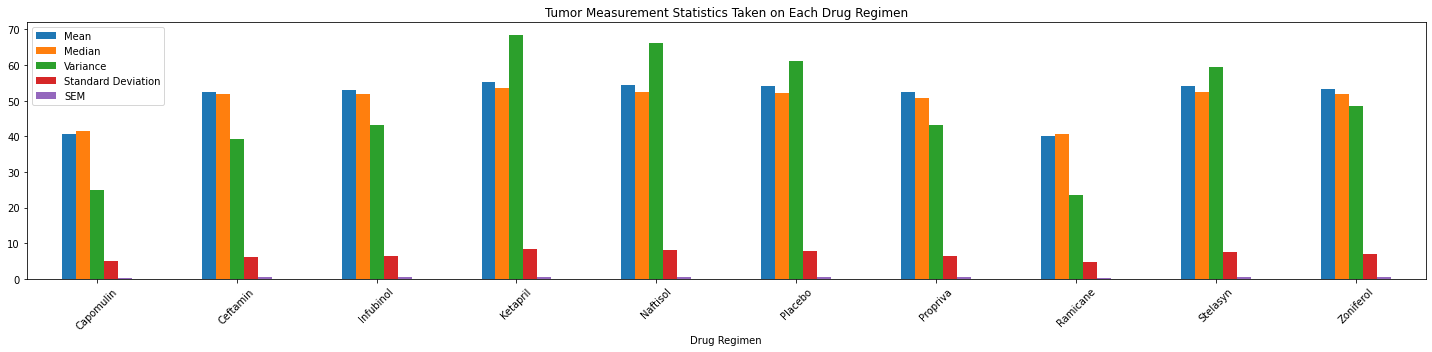

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
ax =tvs_df1.plot(kind='bar',rot=45, figsize=(20,5))
plt.title('Tumor Measurement Statistics Taken on Each Drug Regimen')
plt.tight_layout()
plt.show()

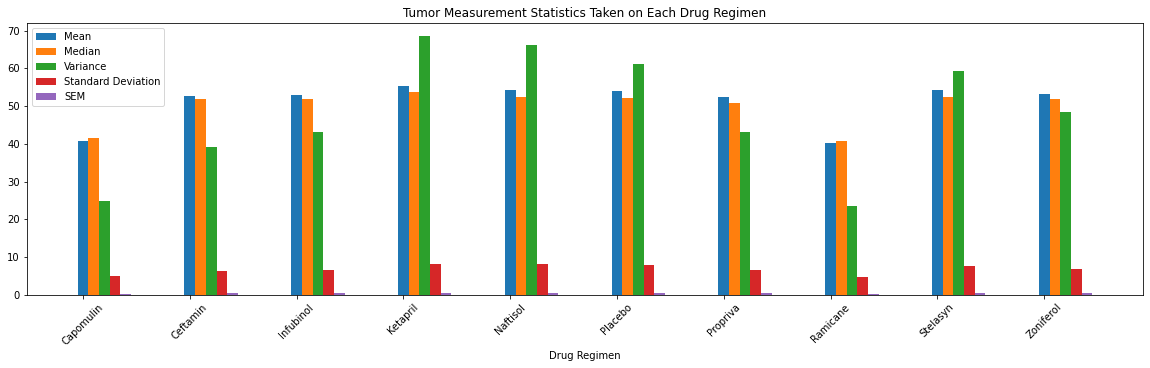

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
def multibarplot(x,y1,y2,y3,y4,y5,ticks):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    width=0.1
    y_values=[y1,y2,y3,y4,y5]
    ticks=ticks
    bars=[]
    for y in range(1,len(y_values)+1):
        if y == 1:
            bar=ax.bar(x_axis,y_values[y-1],width)
            bars.append(bar[0])
        else:
            bar=ax.bar(x_axis+width*(y-1),y_values[y-1],width)
            bars.append(bar[0])
    plt.rcParams["figure.figsize"] = (40,5)
    plt.xticks(x_axis, ticks,rotation=45)
    ax.legend(bars,["Mean", "Median", "Variance","Standard Deviation","SEM"],loc=2)
    plt.xlabel("Drug Regimen")
    plt.title('Tumor Measurement Statistics Taken on Each Drug Regimen')
    plt.show()
x_axis = np.arange(len(tvs_df1["Mean"]))+1
mean_tv=tvs_df1["Mean"]
#ax.bar(x_axis,mean_tv,shift)
median_tv=tvs_df1["Median"]
#ax.bar(x_axis+width,median_tv,shift)
var_tv=tvs_df1["Variance"]
#ax.bar(x_axis+width*2,var_tv,shift)
std_tv=tvs_df1["Standard Deviation"]
sem_tv=tvs_df1["SEM"]
drug_names=tvs_df1.reset_index()["Drug Regimen"]
multibarplot(x_axis,mean_tv,median_tv,var_tv,std_tv,sem_tv,drug_names)

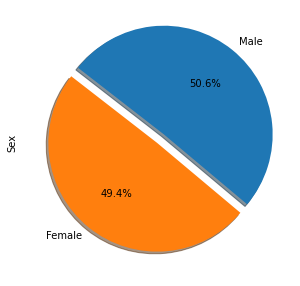

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_nums=combined_data["Sex"].value_counts().plot(kind="pie", explode = (0.1,0), shadow =True, startangle=320,autopct="%1.1f%%")

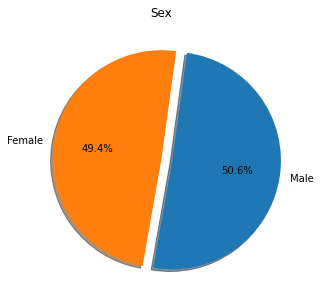

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_count=combined_data.loc[combined_data["Sex"]=="Male"].count()[2]
female_count=combined_data.loc[combined_data["Sex"]=="Female"].count()[2]
sex_counts=[male_count,female_count]
sex_type=["Male", "Female"]
explode = (0.1,0)
plt.pie(sex_counts,explode=explode,labels=sex_type,autopct="%1.1f%%",shadow=True,startangle=260)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
